In [30]:
#bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
 

In [4]:
#atribuindo os dados do csv para a variável 'dados'
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [5]:
#criando o dicionário para adequar as colunas da tabela
dicionario = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
#substitui as colunas pelo dicionário criado
dados = dados.rename(columns = dicionario)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [6]:
#cria um campo 'finalizado' e inverte os valores booleanos em relação ao 'nao_finalizado' para evitar confusões de interpretação
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


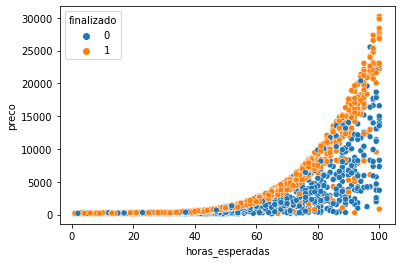

In [7]:
#plota um gráfico dos dados utilizado o método scatterplot da biblioteca seaborn
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

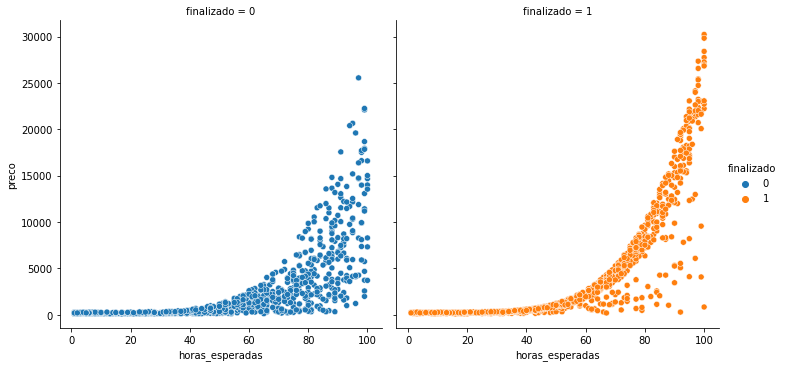

In [8]:
#plota um gráfico dos dados utilizado o método relplot da biblioteca seaborn
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [9]:
#atribui os dados às variáveis x e y para criação do modelo
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [10]:
#criação do modelo
SEED = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x, 
                                                        y,
                                                        random_state = SEED, 
                                                        test_size = 0.25,
                                                        stratify = y)
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia do modelo foi %.2f%%" % acuracia)

A acurácia do modelo foi 52.59%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
#testando a acurácia do algoritmo de baseline para comparação com o modelo
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


In [12]:
#recuperando os valores dos intervalos dos eixos x e y
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 101 27738


In [37]:
#utilizando o método arange da biblioteca Numpy para retornar os espaços entre os invertvalos
pixels = 100 #define quantos pixels há em cada dimensão do gráfico
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [39]:
#utilizando o método meshgrid da biblioteca Numpy para mesclar o grid do gráfico utilizando os intervalos entre x e y
xx, yy = np.meshgrid(eixo_x, eixo_y)
#utilizando o método ravel da biblioteca numpy para concatenar os elementos em um array e atribuir à variável 'pontos'
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [41]:
#a variável 'Z' receberá a predição do array contido em 'pontos'
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)#o método reshape redimensiona o array de acordo com 'xx' 
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

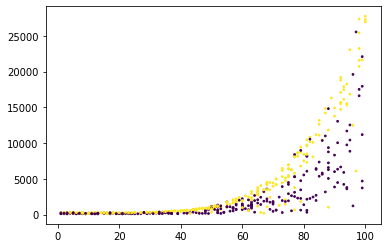

In [33]:
#plotando o gráfico dos testes
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=3)

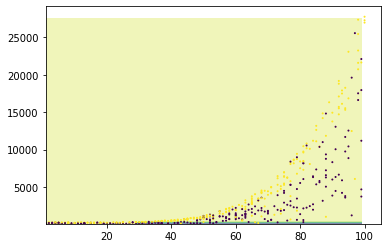

In [34]:
plt.contourf(xx, yy, Z, alpha=0.3) # o método plt.contournf adiciona um contorno ao gráfico recebendo como parâmetro 'xx', 'yy' e 'z'
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)